In [1]:
!pip install openai

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\piyus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import os
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [4]:
from openai import OpenAI
client = OpenAI()

In [5]:
# gpt-4o-2024-08-06

In [6]:
completion = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[
        {"role": "system", "content": "You are an expert AI assistant specializing in artificial intelligence, machine learning, and deep learning. Answer questions accurately, concisely, and with practical examples where helpful. Use technical depth appropriate to the user's question."},
        {
            "role": "user",
            "content": "how can i fill the gap in AI about LLM contex undestanding not about contex windows?"
        }
    ]
)

In [7]:
print(completion.choices[0].message.content)

Filling the gap in LLM contextual understanding—beyond just extending context window sizes—requires advancing how models interpret, reason about, and utilize context. Here are several strategies:

1. **Enhance Model Architectures for Deeper Understanding:**
   - **Incorporate Explicit Reasoning Modules:** Integrate modules like symbolic reasoning or memory-augmented architectures (e.g., Neural Turing Machines, Differentiable Neural Computers) that allow models to manipulate and reason over structured data or long-term information.
   - **Improve Multi-Hop Reasoning:** Design models capable of multi-step inference, such as incorporating graph neural networks or iterative attention mechanisms that can connect related facts across the context.

2. **Structured and Hierarchical Context Modeling:**
   - **Hierarchical Attention:** Implement attention mechanisms that operate at multiple levels—sentence, paragraph, document—to better capture the structure and relationships within longer texts

In [8]:
import json
with open("data2.jsonl","r",encoding="utf-8") as file:
  data=[json.loads(line) for line in file]

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\\\Project\\\\LLM_FINETUNING_OPENAI\\\\data2.jsonl'

In [9]:
data

[{'messages': [{'role': 'system',
    'content': 'You are a customer support assistant for a smartphone company. You are friendly, concise, and provide only factual answers related to smartphones.'},
   {'role': 'user',
    'content': 'How long does the warranty last on a new smartphone?'}]},
 {'messages': [{'role': 'system',
    'content': 'You are a customer support assistant for a smartphone company. You are friendly, concise, and provide only factual answers related to smartphones.'},
   {'role': 'user',
    'content': 'Can I use the same apps on Android and iPhone?'},
   {'role': 'assistant',
    'content': 'Not all apps are available on both platforms. Some apps are exclusive to either Android or iOS, depending on the app store.'}]},
 {'messages': [{'role': 'system',
    'content': 'You are a customer support assistant for a smartphone company. You are friendly, concise, and provide only factual answers related to smartphones.'},
   {'role': 'user',
    'content': 'How often do s

In [ ]:
# import json

# with open("/content/data_error.jsonl","r",encoding="utf-8") as file:
#   data_error=[json.loads(line) for line in file]

In [ ]:
# data[0]['messages'][1]

{'role': 'user',
 'content': 'How long does the warranty last on a new smartphone?'}

In [11]:
print("Num examples:", len(data))
print("First example:")
for message in data[0]["messages"]:
    print(message)

Num examples: 10
First example:
{'role': 'system', 'content': 'You are a customer support assistant for a smartphone company. You are friendly, concise, and provide only factual answers related to smartphones.'}
{'role': 'user', 'content': 'How long does the warranty last on a new smartphone?'}


“We use defaultdict so our error counters start from zero automatically and never crash.”

In [22]:
import json
import tiktoken # for token counting
import numpy as np
from collections import defaultdict

In [18]:
counts = {}

#counts["apple"] = counts["apple"] + 1
counts["apple"] += 1   # ❌ ERROR

KeyError: 'apple'

In [19]:
counts = {}
counts["apple"] = 0


counts["apple"] += 1

In [20]:
counts

{'apple': 1}

In [23]:
counts = defaultdict(int)

In [24]:
counts["apple"] += 1

In [25]:
counts

defaultdict(int, {'apple': 1})

In [26]:
counts["banana"] += 1

In [27]:
counts

defaultdict(int, {'apple': 1, 'banana': 1})

In [28]:
counts["apple"] += 1

In [29]:
print(counts)

defaultdict(<class 'int'>, {'apple': 2, 'banana': 1})


# Format validation

| # | Validation Check         | Code Condition                    | What It Ensures                        | Error Key Raised                    |
| - | ------------------------ | --------------------------------- | -------------------------------------- | ----------------------------------- |
| 1 | Example type             | `isinstance(ex, dict)`            | Each JSONL line is a valid JSON object | `data_type`                         |
| 2 | `messages` key exists    | `ex.get("messages")`              | Conversation structure is present      | `missing_messages_list`             |
| 3 | Required keys in message | `"role"` and `"content"`          | Every message follows chat format      | `message_missing_key`               |
| 4 | No extra keys            | Allowed keys only                 | Prevents unsupported fields            | `message_unrecognized_key`          |
| 5 | Valid role names         | `system/user/assistant/function`  | No invalid or typo roles               | `unrecognized_role`                 |
| 6 | Valid content            | Non-empty string or function_call | Message text is usable                 | `missing_content`                   |
| 7 | Assistant present        | At least one `assistant` role     | Supervised learning signal exists      | `example_missing_assistant_message` |


In [30]:
format_errors = defaultdict(int)

In [31]:
for ex in data:
    if not isinstance(ex, dict):
        format_errors["data_type"] += 1
        continue

    messages = ex.get("messages", None)
    if not messages:
        format_errors["missing_messages_list"] += 1
        continue

    for message in messages:
        if "role" not in message or "content" not in message:
            format_errors["message_missing_key"] += 1

        if any(k not in ("role", "content", "name", "function_call", "weight") for k in message):
            format_errors["message_unrecognized_key"] += 1

        if message.get("role", None) not in ("system", "user", "assistant", "function"):
            format_errors["unrecognized_role"] += 1

        content = message.get("content", None)
        function_call = message.get("function_call", None)

        if (not content and not function_call) or not isinstance(content, str):
            format_errors["missing_content"] += 1

    if not any(message.get("role", None) == "assistant" for message in messages):
        format_errors["example_missing_assistant_message"] += 1

if format_errors:
    print("Found errors:")
    for k, v in format_errors.items():
        print(f"{k}: {v}")
else:
    print("No errors found")

Found errors:
example_missing_assistant_message: 1


# Token Counting Utilities

Ye code fine-tuning se pehle tumhare dataset ka “health check” karta hai — structure, size, aur token safety.

| Function                             | Kaam                                                     |
| ------------------------------------ | -------------------------------------------------------- |
| `num_tokens_from_messages`           | Ek full conversation ke **total tokens** count karta hai |
| `num_assistant_tokens_from_messages` | Sirf **assistant ke answer tokens** count karta hai      |
| `print_distribution`                 | Token/message ka **statistical summary** print karta hai |


| Check                  | Kya ensure karta hai      |
| ---------------------- | ------------------------- |
| system message present | Persona & behavior locked |
| user message present   | Input exists              |
| message count          | Conversation structure    |
| total tokens           | Cost + truncation risk    |
| assistant tokens       | Answer length control     |


| Aspect          | Status    |
| --------------- | --------- |
| Format          | ✅ Perfect |
| Persona         | ✅ Stable  |
| Token size      | ✅ Safe    |
| Cost            | ✅ Low     |
| Truncation risk | ❌ None    |
| SFT ready       | ✅ Yes     |


In [32]:
encoding = tiktoken.get_encoding("cl100k_base")

In [39]:
encoding

<Encoding 'cl100k_base'>

In [33]:
text = "what is AGI?"

In [34]:
len(text)

12

In [35]:
text.split()

['what', 'is', 'AGI?']

In [36]:
len(text.split())

3

In [37]:
token_ids=encoding.encode(text)

| Token   | Token ID |
| ------- | -------- |
| "Hello" | 9906     |
| ","     | 11       |
| " how"  | 1268     |
| " are"  | 527      |
| " you"  | 499      |
| "?"     | 30       |


In [38]:
decoded_text = encoding.decode(token_ids)
print(decoded_text)

what is AGI?


In [42]:
data[0]['messages']

[{'role': 'system',
  'content': 'You are a customer support assistant for a smartphone company. You are friendly, concise, and provide only factual answers related to smartphones.'},
 {'role': 'user',
  'content': 'How long does the warranty last on a new smartphone?'}]

In [ ]:
# def num_tokens_from_messages(messages, tokens_per_message=3, tokens_per_name=1):
#     num_tokens = 0
#     for message in messages:
#         num_tokens += tokens_per_message
#         for key, value in message.items():
#             num_tokens += len(encoding.encode(value))
#             if key == "name":
#                 num_tokens += tokens_per_name
#     num_tokens += 3
#     return num_tokens

# def num_assistant_tokens_from_messages(messages):
#     num_tokens = 0
#     for message in messages:
#         if message["role"] == "assistant":
#             num_tokens += len(encoding.encode(message["content"]))
#     return num_tokens

# def print_distribution(values, name):
#     print(f"\n#### Distribution of {name}:")
#     print(f"min / max: {min(values)}, {max(values)}")
#     print(f"mean / median: {np.mean(values)}, {np.median(values)}")
#     print(f"p5 / p95: {np.quantile(values, 0.1)}, {np.quantile(values, 0.9)}")

# # Warnings and tokens counts
# n_missing_system = 0
# n_missing_user = 0
# n_messages = []
# convo_lens = []
# assistant_message_lens = []

# for ex in data:
#     messages = ex["messages"]
#     if not any(message["role"] == "system" for message in messages):
#         n_missing_system += 1
#     if not any(message["role"] == "user" for message in messages):
#         n_missing_user += 1
#     n_messages.append(len(messages))
#     convo_lens.append(num_tokens_from_messages(messages))
#     assistant_message_lens.append(num_assistant_tokens_from_messages(messages))

# print("Num examples missing system message:", n_missing_system)
# print("Num examples missing user message:", n_missing_user)
# print_distribution(n_messages, "num_messages_per_example")
# print_distribution(convo_lens, "num_total_tokens_per_example")
# print_distribution(assistant_message_lens, "num_assistant_tokens_per_example")
# n_too_long = sum(l > 16385 for l in convo_lens)
# print(f"\n{n_too_long} examples may be over the 16,385 token limit, they will be truncated during fine-tuning")

In [43]:
import numpy as np
total_tokens = []
assistant_tokens = []

def count_total_tokens(messages):
    return sum(len(encoding.encode(m["content"])) for m in messages)

def count_assistant_tokens(messages):
    return sum(
        len(encoding.encode(m["content"]))
        for m in messages
        if m["role"] == "assistant"
    )


In [44]:
for ex in data:
    messages = ex["messages"]
    total_tokens.append(count_total_tokens(messages))
    assistant_tokens.append(count_assistant_tokens(messages))

In [45]:
total_tokens

[37, 62, 51, 62, 51, 54, 54, 53, 57, 59]

In [46]:
assistant_tokens

[0, 25, 17, 24, 17, 20, 19, 22, 22, 24]

In [47]:
print("Avg total tokens per example:", int(np.mean(total_tokens)))
print("Max total tokens per example:", max(total_tokens))

Avg total tokens per example: 54
Max total tokens per example: 62


In [48]:
print("Avg assistant tokens:", int(np.mean(assistant_tokens)))
print("Max assistant tokens:", max(assistant_tokens))

Avg assistant tokens: 19
Max assistant tokens: 25


# Cost Estimation

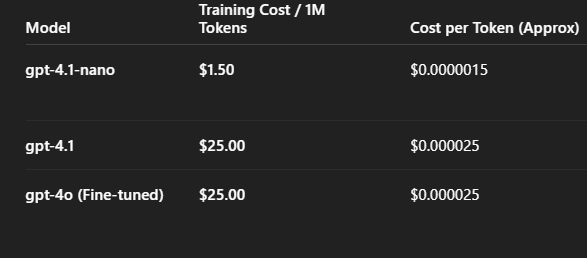

| Parameter             | Value           | Meaning (Simple)                                         | Why It Exists                                              |
| --------------------- | --------------- | -------------------------------------------------------- | ---------------------------------------------------------- |
| `TARGET_EPOCHS`       | `3`             | Default training passes (dataset ko 3 baar repeat karna) | Balanced learning: na kam, na zyada                        |
| `MIN_TARGET_EXAMPLES` | `100`           | Minimum total training examples (examples × epochs)      | Chhote dataset me enough learning ensure karne ke liye     |
| `MAX_TARGET_EXAMPLES` | `25000`         | Maximum total training examples                          | Bahut bade dataset me cost explode hone se bachane ke liye |
| `MIN_DEFAULT_EPOCHS`  | `1`             | Minimum allowed epochs                                   | Kam se kam ek full pass toh ho                             |
| `MAX_DEFAULT_EPOCHS`  | `25`            | Maximum allowed epochs                                   | Overfitting + zyada cost se bachav                         |
| `n_epochs`            | `TARGET_EPOCHS` | Final epochs (start me default = 3)                      | Baad me dataset size dekh kar adjust hota hai              |


In [49]:
#EXAMPLE

{
  "messages": [
    {"role": "system", "content": "..."},
    {"role": "user", "content": "..."},
    {"role": "assistant", "content": "..."}
  ]
}

16385

16385

In [51]:
#EXAMPLE

{
  "messages": [
    {"role": "system", "content": "..."},
    {"role": "user", "content": "..."},
    {"role": "assistant", "content": "..."}
  ]
}
#EXAMPLE

{
  "messages": [
    {"role": "system", "content": "..."},
    {"role": "user", "content": "..."},
    {"role": "assistant", "content": "..."}
  ]
}
#EXAMPLE

{
  "messages": [
    {"role": "system", "content": "..."},
    {"role": "user", "content": "..."},
    {"role": "assistant", "content": "..."}
  ]
}


{'messages': [{'role': 'system', 'content': '...'},
  {'role': 'user', 'content': '...'},
  {'role': 'assistant', 'content': '...'}]}

EPOCHS = forward+backward propagtion

An epoch is one complete pass over the entire training dataset, during which the model computes the loss, applies the optimizer, and updates its weights.

In [52]:
# Pricing and default n_epochs estimate
MAX_TOKENS_PER_EXAMPLE = 16385

In [53]:
MIN_DEFAULT_EPOCHS = 1
MAX_DEFAULT_EPOCHS = 25

In [54]:
#TARGET_EPOCHS = 3
n_epochs = 3

In [55]:
# Warnings and tokens counts
total_tokens_per_example  = []
# assistant_tokens_per_example  = []

In [56]:
def num_assistant_tokens_from_messages(messages):
    num_tokens = 0
    for message in messages:
        if message["role"] == "assistant":
            num_tokens += len(encoding.encode(message["content"]))
    return num_tokens

#### This function estimates how many tokens one training example (one conversation) will use.

messages = a conversation
(system + user + assistant)

tokens_per_message = 3
→ every message has extra hidden tokens

tokens_per_name = 1
→ if a message has a name, add 1 token

##### [MSG_START]....[MSG_END]

#### It matches OpenAI’s internal structure closely

In [78]:
def num_tokens_from_messages(messages, tokens_per_message=2, tokens_per_name=1):
    num_tokens = 0
    for message in messages:
        num_tokens += tokens_per_message
        for key, value in message.items():
            num_tokens += len(encoding.encode(value))
            if key == "name":
                num_tokens += tokens_per_name
    num_tokens += 2
    return num_tokens

In [79]:
for ex in data:
    messages = ex["messages"]
    total_tokens_per_example.append(num_tokens_from_messages(messages))
    # assistant_tokens_per_example.append(num_assistant_tokens_from_messages(messages))

In [80]:
n_too_long = sum(l > 16385 for l in total_tokens_per_example)
print(f"\n{n_too_long} examples may be over the 16,385 token limit, if they are crossing the limit they will be truncated during fine-tuning")


0 examples may be over the 16,385 token limit, if they are crossing the limit they will be truncated during fine-tuning


In [81]:
n_billing_tokens_in_dataset = sum(min(MAX_TOKENS_PER_EXAMPLE, length) for length in total_tokens_per_example)

In [82]:
print(f"Dataset has ~{n_billing_tokens_in_dataset} tokens that will be charged for during training")

Dataset has ~647 tokens that will be charged for during training


In [83]:
print(f"By default, you'll be charged for ~{n_epochs * n_billing_tokens_in_dataset} tokens")

By default, you'll be charged for ~1941 tokens


$1.50 / 1,000,000 = $0.0000015 per token
2016 × 0.0000015 = $0.003024
$0.003024 × 91 = ₹0.275184


In [84]:
# TARGET_EXAMPLES = dataset rows × epochs
# MIN_TARGET_EXAMPLES = 100
# MAX_TARGET_EXAMPLES = 25000
# n_train_examples = len(data)
# if n_train_examples * n_epochs < MIN_TARGET_EXAMPLES:
#     n_epochs = min(MAX_DEFAULT_EPOCHS, MIN_TARGET_EXAMPLES // n_train_examples)
# elif n_train_examples * n_epochs > MAX_TARGET_EXAMPLES:
#     n_epochs = max(MIN_DEFAULT_EPOCHS, MAX_TARGET_EXAMPLES // n_train_examples)

# print(f"By default, you'll train for {n_epochs} epochs on this dataset")
# print(f"By default, you'll be charged for ~{n_epochs * n_billing_tokens_in_dataset} tokens")

## Training starts from here

In [85]:
client

In [86]:
client.files.create(
    file=open("data.jsonl","rb"),
    purpose="fine-tune"
)

FileObject(id='file-QHMzUJ9mEGrP28RHBtawuN', bytes=4239, created_at=1772191792, filename='data.jsonl', object='file', purpose='fine-tune', status='processed', expires_at=None, status_details=None)

In [87]:
files=client.files.list()

In [88]:
files

SyncCursorPage[FileObject](data=[FileObject(id='file-QHMzUJ9mEGrP28RHBtawuN', bytes=4239, created_at=1772191792, filename='data.jsonl', object='file', purpose='fine-tune', status='processed', expires_at=None, status_details=None), FileObject(id='file-DXEtEkwwgTvdRKJ7yBPJtB', bytes=4239, created_at=1772190599, filename='data.jsonl', object='file', purpose='fine-tune', status='processed', expires_at=None, status_details=None)], has_more=False, object='list', first_id='file-QHMzUJ9mEGrP28RHBtawuN', last_id='file-DXEtEkwwgTvdRKJ7yBPJtB')

In [89]:
for file in files:
  print(file.id)
  print(100*"=")
  print(file.purpose)
  print(100*"=")
  print(file)

file-QHMzUJ9mEGrP28RHBtawuN
fine-tune
FileObject(id='file-QHMzUJ9mEGrP28RHBtawuN', bytes=4239, created_at=1772191792, filename='data.jsonl', object='file', purpose='fine-tune', status='processed', expires_at=None, status_details=None)
file-DXEtEkwwgTvdRKJ7yBPJtB
fine-tune
FileObject(id='file-DXEtEkwwgTvdRKJ7yBPJtB', bytes=4239, created_at=1772190599, filename='data.jsonl', object='file', purpose='fine-tune', status='processed', expires_at=None, status_details=None)


In [90]:
training_file_id="file-QHMzUJ9mEGrP28RHBtawuN"

In [91]:
suffix_name="final-finetune-model"

In [74]:
client.fine_tuning.jobs.create(
    training_file=training_file_id,
    model="gpt-3.5-turbo",
    suffix=suffix_name
)

FineTuningJob(id='ftjob-KlwIg95d4L5P9ouiBWYFN01R', created_at=1772191759, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(batch_size='auto', learning_rate_multiplier='auto', n_epochs='auto'), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-s0OX7bgWGmnZGUCe5b8us8aE', result_files=[], seed=1869280486, status='validating_files', trained_tokens=None, training_file='file-DXEtEkwwgTvdRKJ7yBPJtB', validation_file=None, estimated_finish=None, integrations=[], metadata=None, method=Method(type='supervised', dpo=None, reinforcement=None, supervised=SupervisedMethod(hyperparameters=SupervisedHyperparameters(batch_size='auto', learning_rate_multiplier='auto', n_epochs='auto'))), user_provided_suffix='second-finetune-model', usage_metrics=None, shared_with_openai=False, eval_id=None, internal_worker_backend=None)

In [92]:
client.fine_tuning.jobs.create(
  training_file=training_file_id,
  model="gpt-4o-2024-08-06",
  suffix=suffix_name,
  method={
    "type": "supervised",
    "supervised": {
      "hyperparameters": {
        "batch_size": 16,
        "learning_rate_multiplier": 1.0,
        "n_epochs": 3
      }
    }
  }
)


FineTuningJob(id='ftjob-LKkhZ7wwixffPdr4AmNWJL6R', created_at=1772191852, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(batch_size=16, learning_rate_multiplier=1.0, n_epochs=3), model='gpt-4o-2024-08-06', object='fine_tuning.job', organization_id='org-s0OX7bgWGmnZGUCe5b8us8aE', result_files=[], seed=743229191, status='validating_files', trained_tokens=None, training_file='file-QHMzUJ9mEGrP28RHBtawuN', validation_file=None, estimated_finish=None, integrations=[], metadata=None, method=Method(type='supervised', dpo=None, reinforcement=None, supervised=SupervisedMethod(hyperparameters=SupervisedHyperparameters(batch_size=16, learning_rate_multiplier=1.0, n_epochs=3))), user_provided_suffix='final-finetune-model', usage_metrics=None, shared_with_openai=False, eval_id=None, internal_worker_backend=None)

In [93]:
client.fine_tuning.jobs.list()

SyncCursorPage[FineTuningJob](data=[FineTuningJob(id='ftjob-LKkhZ7wwixffPdr4AmNWJL6R', created_at=1772191852, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(batch_size=16, learning_rate_multiplier=1.0, n_epochs=3), model='gpt-4o-2024-08-06', object='fine_tuning.job', organization_id='org-s0OX7bgWGmnZGUCe5b8us8aE', result_files=[], seed=743229191, status='validating_files', trained_tokens=None, training_file='file-QHMzUJ9mEGrP28RHBtawuN', validation_file=None, estimated_finish=None, integrations=[], metadata=None, method=Method(type='supervised', dpo=None, reinforcement=None, supervised=SupervisedMethod(hyperparameters=SupervisedHyperparameters(batch_size=16, learning_rate_multiplier=1.0, n_epochs=3))), user_provided_suffix='final-finetune-model', usage_metrics=None, shared_with_openai=False, eval_id=None, internal_worker_backend=None), FineTuningJob(id='ftjob-KlwIg95d4L5P9ouiBWYFN01R', created_at=1772191759, er

In [94]:
for job in client.fine_tuning.jobs.list():
  print(job.fine_tuned_model)

None
None
None
None


In [97]:
for job in client.fine_tuning.jobs.list(limit=20).data:
    print(job.id, job.status, job.fine_tuned_model)

ftjob-LKkhZ7wwixffPdr4AmNWJL6R cancelled None
ftjob-KlwIg95d4L5P9ouiBWYFN01R cancelled None
ftjob-9BMPNrnLY65CcUzacAP7RZLc cancelled None
ftjob-gv4c9jXZhuAevfaowbeNpHre succeeded ft:gpt-4.1-nano-2025-04-14:grisha:second-finetune-model:DDqJXcPR


In [77]:
for job in client.fine_tuning.jobs.list():
  print(job.fine_tuned_model)

None
None
None


In [98]:
client.chat.completions.create(
    model="ft:gpt-4.1-nano-2025-04-14:grisha:second-finetune-model:DDqJXcPR",
    messages=[
        {"role": "system", "content": "You are a customer support agent for a smartphone company whose primary goal is to help users with issues they are experiencing with their smartphones. You are friendly and concise. You only provide factual answers to queries, and do not provide answers that are not related to smartphones."},
        {
            "role": "user",
            "content": "What warranty does a smartphone come with?"
        }
    ]
)

ChatCompletion(id='chatcmpl-DDqVpcoQseKZMlslU4EUUcaXOPIxl', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The warranty details depend on the model and region. Please refer to the official website or warranty documentation provided with your device.', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1772192493, model='ft:gpt-4.1-nano-2025-04-14:grisha:second-finetune-model:DDqJXcPR', object='chat.completion', service_tier='default', system_fingerprint='fp_99264b0d92', usage=CompletionUsage(completion_tokens=24, prompt_tokens=71, total_tokens=95, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

In [99]:
ans=client.chat.completions.create(
    model="ft:gpt-4.1-nano-2025-04-14:grisha:second-finetune-model:DDqJXcPR",
    messages=[
        {"role": "system", "content": "You are a customer support agent for a smartphone company whose primary goal is to help users with issues they are experiencing with their smartphones. You are friendly and concise. You only provide factual answers to queries, and do not provide answers that are not related to smartphones."},
        {
            "role": "user",
            "content": "what is the problem with my smartphone?"
        }
    ]
)

In [100]:
print(ans.choices[0].message.content)

I cannot diagnose issues; please contact support for troubleshooting.
